In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error,r2_score

In [2]:
!pip install -U statsmodels

import statsmodels

In [3]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv',
                 index_col = 'Month',
                 skipfooter = 2,
                 parse_dates = True)

<ipython-input-3-a97cd70c7246>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('perrin-freres-monthly-champagne.csv',


In [4]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
df.index_freq = 'MS'

In [6]:
df.columns = ['Sales']

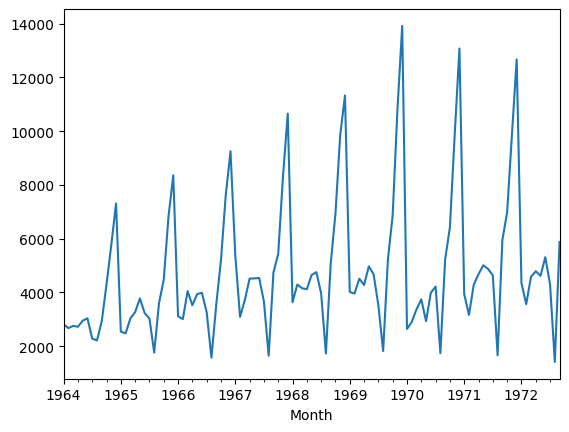

In [7]:
df['Sales'].plot();

In [8]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [9]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
hw = ExponentialSmoothing(
    train['Sales'],
    seasonal_periods = 12,
    initialization_method = 'legacy-heuristic',
    trend = 'add', seasonal = 'add'
)

res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

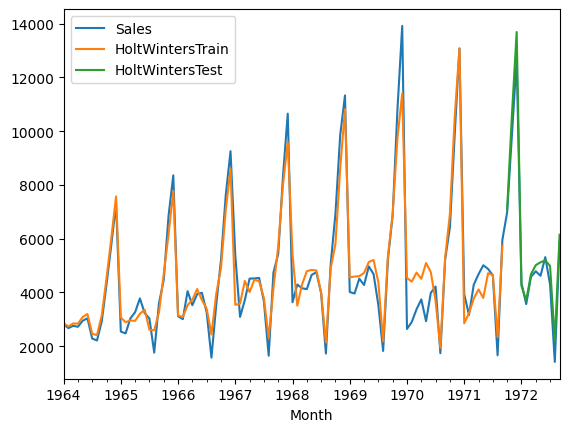

In [13]:
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot();